
## Graph

<img src=https://momath.org/wp-content/uploads/2013/10/graph_theory-300x292.jpeg width=200px align=right>

- Represent connections between objects

> **Vertex**: a node of the graph <br>
> **Edge**: a link between two nodes 

- A graph consists of a set of vertices and a set of edges

>$ G\,(V,E) $



## Similarity Graph

- Connect similar objects in a dataset

> Measure of similarity on the edges


## Simple Implementation

In [1]:
class vert(object):
    def __init__(self, data=None):
        self.data = data

class edge(object):
    def __init__(self, A, B, w=1):
        self.A, self.B = A, B
        self.w = w

In [2]:
V = [ vert('zero'), vert('one'), vert('two'), 
      vert('three'), vert('four') ] 

E = [ edge(V[0],V[1]), edge(V[0],V[2]), edge(V[0],V[3]), 
      edge(V[1],V[3]),
      edge(V[2],V[3]), edge(V[2],V[4]), 
      edge(V[3],V[4]) ]

for edge in E: 
    print (edge.A.data, '\t--<%.1f>--\t' % edge.w, edge.B.data)

zero 	--<1.0>--	 one
zero 	--<1.0>--	 two
zero 	--<1.0>--	 three
one 	--<1.0>--	 three
two 	--<1.0>--	 three
two 	--<1.0>--	 four
three 	--<1.0>--	 four


## Adjacency Matrix

- Are two vertices connected?

> Encode it in a $(n\!\times\!n)$ **matrix** $A$

- The matrix elements

>$ a_{ij} = \left\{ \begin{array}{ll}
         1 & \mbox{if $i$ and $j$ are connected}\\
         0 & \mbox{otherwise}\end{array} \right.  $
         
- Symmetric matrix
         

### For example

- The previous case becomes 

>$ A = \left( \begin{array}{ccc}
0 & 1 & 1 & 1 & 0  \\
1 & 0 & 0 & 1 & 0  \\
1 & 0 & 0 & 1 & 1  \\
1 & 1 & 1 & 0 & 1  \\
0 & 0 & 1 & 1 & 0  \\
\end{array} \right)$

## Spectral Clustering

- How to cut the graph into pieces with minimal "damage"

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Min_cut_example.svg/330px-Min_cut_example.svg.png align=left width=220>



## Graph Laplacian

- Degree matrix $D$ is diagonal matrix formed from the sum of all edges

>$\displaystyle d_{ii} = \sum_j^n a_{ij} $

- The graph Laplacian

>$ L = D - A$

- What's so special abou this?!

## An Interesting Property

- For any $x \in \mathbb{R}^n$, the bilinear expression $x^T L\,x $ has a familiar formula

>$\displaystyle x^T L\,x = \sum_{i}^n d_{ii} x_i^2 - \sum_{i,j}^n  a_{ij}\,x_i x_j $

>$\displaystyle \hspace{0.5in} = \frac{1}{2} \left\{ \sum_{i}^n d_{ii} x_i^2 - 2\sum_{i,j}^n  a_{ij}\,x_i x_j  + \sum_{j}^n d_{jj} x_j^2 \right\}$

>$\displaystyle  \hspace{0.5in} = \frac{1}{2} \left\{ \sum_{i,j}^n a_{ij} x_i^2 - 2\sum_{i,j}^n  a_{ij}\,x_i x_j  + \sum_{i,j}^n a_{ij} x_j^2 \right\}$

>$\displaystyle  \hspace{0.5in} = \frac{1}{2}\sum_{i,j}^n a_{ij}\,(x_i\!-\!x_j)^2 $


- Which is


>$\displaystyle x^T L\,x = \frac{1}{2}\sum_{i,j}^n a_{ij}\,(x_i\!-\!x_j)^2 = $ $\displaystyle \frac{1}{2}\sum_{(i,j)\in{}E} (x_i\!-\!x_j)^2$

## Minimization

- Solution: the smallest eigenvalues of $L$ and corresponding eigenvectors

> The 1st eigenvector is the trivial solution <br>
> We use the 2nd eigenvector, and so on...

- Laplacian eigenmaps

> Different similarity matrices to start with<br>
> Different normalizations

## Weighted Edges

- Instead of $A$ we can use a weight matrix $W$

>$ L = D - W$ 

> where $D$ has diagonal elements

>$\displaystyle d_{ii} = \sum_j w_{ij}$

- And the result is again 

>$\displaystyle x^T L\,x = \frac{1}{2}\sum_{i,j}^n w_{ij}\,(x_i\!-\!x_j)^2 = $ $\displaystyle \frac{1}{2}\sum_{(i,j)\in{}E} w_{ij}\,(x_i\!-\!x_j)^2$

## Variants

 - Simple Laplacian
 
 >$ L = D-W$
 
 - Normalized Laplacian
 
 >$ L_N = D^{-1/2}\,L\,D^{-1/2} = I -  D^{-1/2}\,W\,D^{-1/2}$
 
 - Relaxed Laplacian
 
 >$ L_{\rho} = L - \rho D$
 
 - Beltrami, etc...

## Demo from Scratch

0. Simulated dataset with blobs in 2-D
0. Build the adjacency matrix based on a distance threshold: $d_{ij}=\sqrt{(x_i-x_j)^2 + (y_i-y_j)^2} < d_T$
0. Calculate the $D$ degree matrix
0. Calculate the $L$ graph Laplacian
0. Solve the eigenproblem of $L$
0. Study the eigenvalues and eigenvectors

In [5]:
import numpy as np
import matplotlib.pyplot as plt

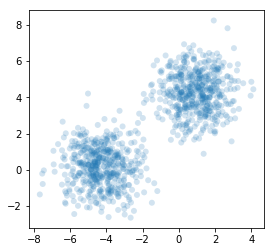

In [7]:
from sklearn import datasets
np.random.seed(3)

X,_ = datasets.make_blobs(n_samples=1000, centers=2, cluster_std=1.1)

plt.figure(); plt.subplot(111,aspect='equal'); 
plt.scatter(X[:,0], X[:,1], alpha=0.2, edgecolor='none');

In [8]:
# Reshape data for broadcasting
m1 = X[np.newaxis, :, :]
m2 = X[:, np.newaxis, :]
print (X.shape)
print (m1.shape)
print (m2.shape)

(1000, 2)
(1, 1000, 2)
(1000, 1, 2)


In [9]:
# Pairwise distances
r = m1 - m2
print (r.shape)
r *= r 
d2 = r.sum(axis=2)
print (d2.shape)

(1000, 1000, 2)
(1000, 1000)


Symmetric? True


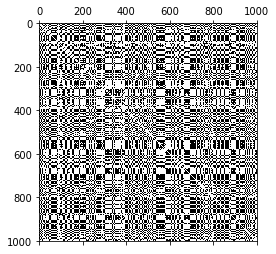

In [13]:
# adjacency matrix
A = (d2<9)
np.fill_diagonal(A,False)
A = A.astype(np.float)
print ('Symmetric?', np.allclose(A,A.T) )
plt.spy(A);

2.004893976622995e-15 4.142642020705334 (1000,) (1000, 1000)


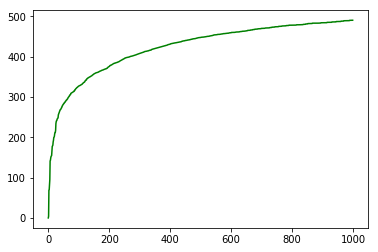

In [15]:
dd = A.sum(axis=0)
D = np.diag(dd)

L = D - A

w, v = np.linalg.eigh(L)

print (w[0], w[1], w.shape, v.shape)
plt.plot(w,'g');

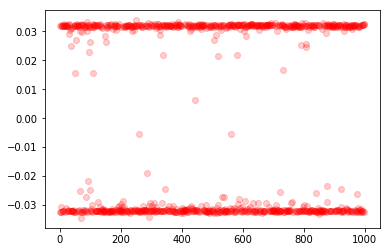

In [16]:
plt.plot(v[:,1], 'or', alpha=0.2);

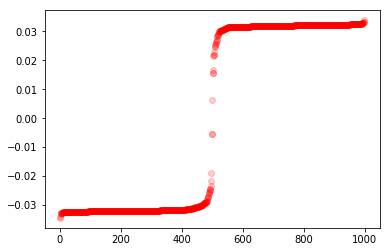

In [18]:
s = np.argsort(v[:,1])
plt.plot(v[s,1], 'ro', alpha=0.2);

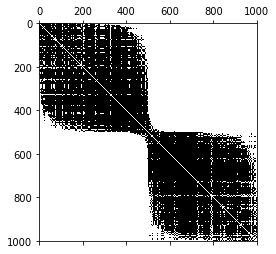

In [19]:
i,j = np.meshgrid(s,s)
plt.spy(A[i,j]);

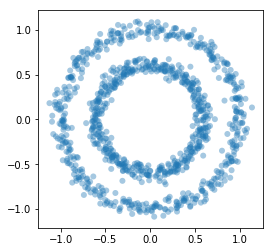

In [26]:
np.random.seed(3) # try other seeds, e.g., 0

X, c = datasets.make_circles(n_samples=1000, factor=0.6, noise=0.05)

plt.figure(); plt.subplot(111,aspect='equal'); 
plt.scatter(X[:,0], X[:,1], alpha=0.4, edgecolor='none');

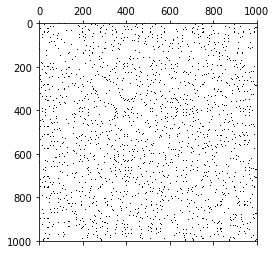

In [28]:
d =  X[np.newaxis,:,:] - X[:,np.newaxis,:]
d2 = (d*d).sum(axis=2)
A = (d2<0.04).astype(np.float) # distance threshold 
np.fill_diagonal(A,0); plt.spy(A);

[-4.37020359e-15  3.81643875e-02  1.81071962e-01]
(3,) (1000, 3)


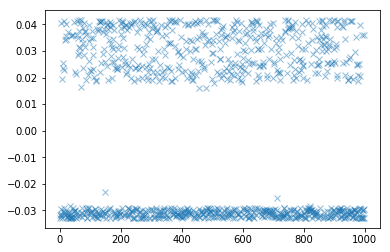

In [31]:
from scipy.linalg import eigh # different solvers
from scipy.sparse.linalg import eigsh

dd = A.sum(axis=0)
D = np.diag(dd)

L = D - A

w, v = eigsh(L, 3, which='SA', tol=1e-2)

print (w[0:4])
print (w.shape, v.shape)
#plot(w)

plt.figure()
plt.plot(v[:,1], 'x', alpha=0.5);

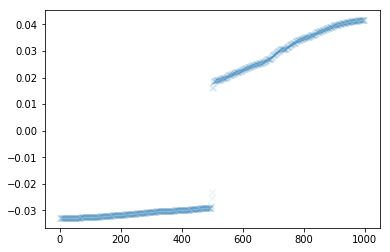

In [34]:
s = np.argsort(v[:,1]); plt.plot(v[s,1],'x',alpha=0.1);

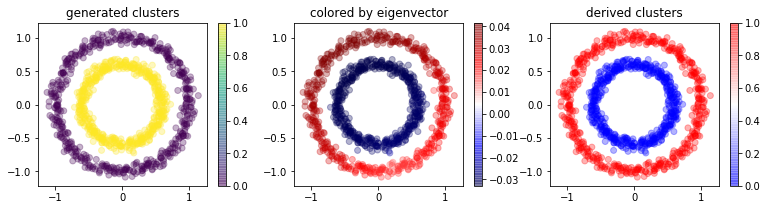

In [40]:
plt.figure(figsize=(13,3)); 

plt.subplot(131,aspect='equal'); plt.scatter(X[:,0],X[:,1],c=c,alpha=0.3); 
plt.colorbar(); plt.title('generated clusters');

plt.subplot(132,aspect='equal'); plt.scatter(X[:,0],X[:,1],c=v[:,1],cmap='seismic',alpha=0.3); 
plt.colorbar(); plt.title('colored by eigenvector');

plt.subplot(133,aspect='equal'); plt.scatter(X[:,0],X[:,1],c=(v[:,1]>0),cmap='bwr', alpha=0.3); 
plt.colorbar(); plt.title('derived clusters');

## Using weights

- Instead of the 0/1 in the adjacency matrix $A$, we use a weight matrix $W$

[-3.20895017e-15  5.95166131e-02  7.74030224e-02]


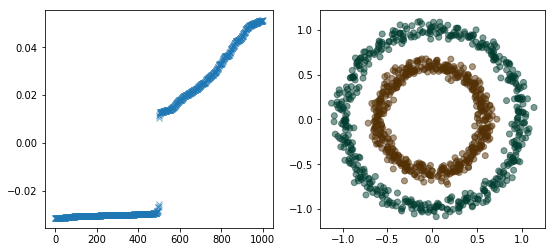

In [44]:
# Weight matrix 
d =  X[np.newaxis,:,:] - X[:,np.newaxis,:]
d2 = (d*d).sum(axis=2)

W = np.exp(-d2 / 0.016)
np.fill_diagonal(W,0)

# Laplacian
dd = W.sum(axis=0)
D = np.diag(dd)
L = D - W

# eigenproblem
w, v = eigsh(L, 3, which='SM')
labels = v[:,1] > 0
print (w[:4])

# plots
plt.figure(figsize=(9,4)); plt.subplot(121);

s = np.argsort(v[:,1]); plt.plot(v[s,1], 'x', alpha=0.6);
plt.subplot(122,aspect='equal')
plt.scatter(X[:,0], X[:,1], c=labels, cmap='BrBG', alpha=0.5);

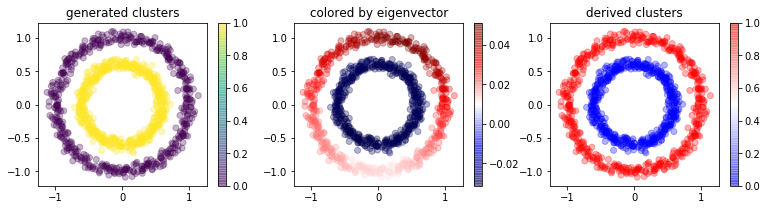

In [47]:
plt.figure(figsize=(13,3)); 

plt.subplot(131,aspect='equal'); plt.scatter(X[:,0],X[:,1],c=c,alpha=0.3); 
plt.colorbar(); plt.title('generated clusters');

plt.subplot(132,aspect='equal'); plt.scatter(X[:,0],X[:,1],c=v[:,1],cmap='seismic',alpha=0.3); 
plt.colorbar(); plt.title('colored by eigenvector');

plt.subplot(133,aspect='equal'); plt.scatter(X[:,0],X[:,1],c=(v[:,1]>0),cmap='bwr', alpha=0.3); 
plt.colorbar(); plt.title('derived clusters');

## Embedding coordinates

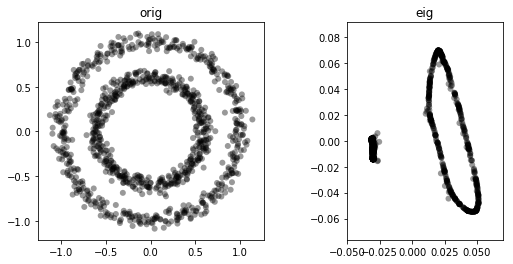

In [48]:
plt.figure(figsize=(9,4)); 

plt.subplot(121,aspect='equal');
plt.scatter(X[:,0],X[:,1],c='k',edgecolor='none',alpha=0.4); plt.title('orig');

plt.subplot(122,aspect='equal');
plt.scatter(v[:,1],v[:,2],c='k',edgecolor='none',alpha=0.4); plt.title('eig');

## Embedding with scikit-learn

> See online [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.spectral_embedding.html)



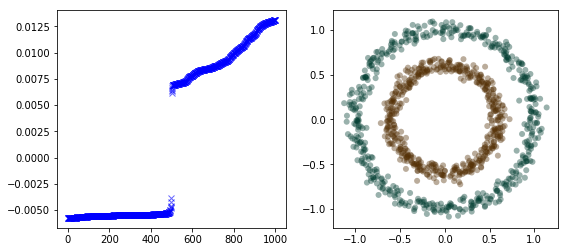

In [51]:
from sklearn.manifold import spectral_embedding

v = spectral_embedding(adjacency=W, n_components=3, 
                       drop_first=False)
s = np.argsort(v[:,1]) 

plt.figure(figsize=(9,4)) 
plt.subplot(121); plt.plot(v[s,1], 'xb', alpha=0.6)
plt.subplot(122, aspect='equal')
plt.scatter(X[:,0],X[:,1],c=(v[:,1]>0),cmap='BrBG',edgecolor='none',alpha=0.4);

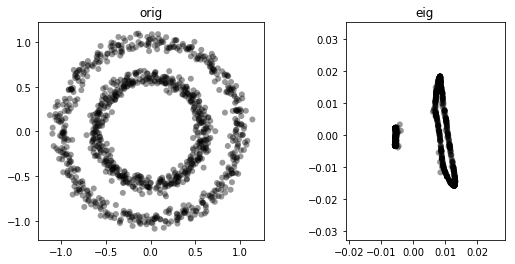

In [53]:
plt.figure(figsize=(9,4)); 

plt.subplot(121,aspect='equal')
plt.scatter(X[:,0],X[:,1],c='k',edgecolor='none',alpha=0.4); plt.title('orig');

plt.subplot(122,aspect='equal');
plt.scatter(v[:,1],v[:,2],c='k',edgecolor='none',alpha=0.4); plt.title('eig');

## Alternatively

> See online [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html)


## Parameters

- Often we use a combination of two parameters

> $k$: number of neighbors to consider for similarity graph

> $\epsilon$: bandwidth of the $\exp\left(-d^2/\epsilon\right)$ similarity

## Clustering scikit-learn

> See online [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering)

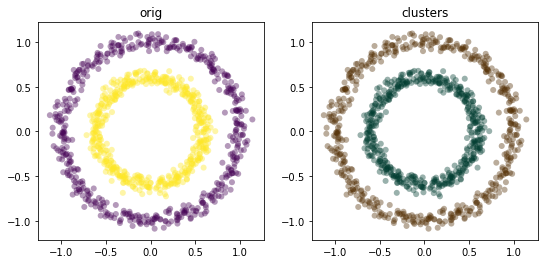

In [57]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=2)
clusters = sc.fit_predict(X)

plt.figure(figsize=(9,4)); 

plt.subplot(121,aspect='equal')
plt.scatter(X[:,0],X[:,1],c=c,edgecolor='none',alpha=0.4); plt.title('orig');

#c = (v[:,1]<0)
#c=clusters
plt.subplot(122,aspect='equal');
plt.scatter(X[:,0],X[:,1],c = (v[:,1]<0),cmap='BrBG',edgecolor='none',alpha=0.4); plt.title('clusters');